In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
bc=pd.read_csv('C:/Users/siddharth21.TRN/Downloads/Classification_Datasets_-_Reg/wisc_bc_data.csv')
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,M,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,...,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.379100,0.15140,0.2837,0.08019
1,8913,B,12.890,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.05366,0.2309,0.06915
2,8915,B,14.960,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,...,16.250,26.19,109.10,809.8,0.13130,0.30300,0.180400,0.14890,0.2962,0.08472
3,9047,B,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.08388,0.3297,0.07834
4,85715,M,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.500600,0.20880,0.3900,0.11790
5,86208,M,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.220,31.59,156.10,1750.0,0.11900,0.35390,0.409800,0.15730,0.3689,0.08368
6,86211,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.049800,0.05882,0.2227,0.07376
7,86355,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.960800,0.29100,0.4055,0.09789
8,86408,B,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.221600,0.11050,0.2226,0.08486
9,86409,B,14.260,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,...,15.300,23.73,107.00,709.0,0.08949,0.41930,0.678300,0.15050,0.2398,0.10820


In [3]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [4]:
bc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
bc.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

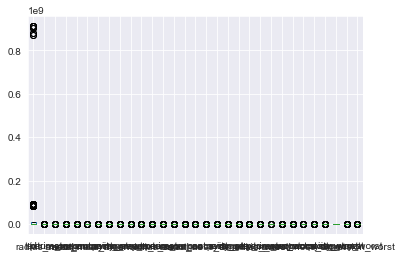

In [6]:
bc.plot(kind='box')

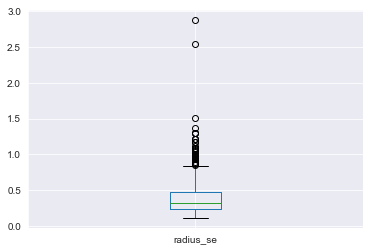

In [8]:
bc['radius_se'].plot(kind='box')

In [9]:
bc['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
le_diagnosis=LabelEncoder()
le_diagnosis=le_diagnosis.fit(bc['diagnosis'])
bc['diagnosis']=le_diagnosis.transform(bc['diagnosis'])

In [12]:
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,8670,1,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,...,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.379100,0.15140,0.2837,0.08019
1,8913,0,12.890,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.05366,0.2309,0.06915
2,8915,0,14.960,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,...,16.250,26.19,109.10,809.8,0.13130,0.30300,0.180400,0.14890,0.2962,0.08472
3,9047,0,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.08388,0.3297,0.07834
4,85715,1,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.500600,0.20880,0.3900,0.11790
5,86208,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,...,24.220,31.59,156.10,1750.0,0.11900,0.35390,0.409800,0.15730,0.3689,0.08368
6,86211,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.049800,0.05882,0.2227,0.07376
7,86355,1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.960800,0.29100,0.4055,0.09789
8,86408,0,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.221600,0.11050,0.2226,0.08486
9,86409,0,14.260,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,...,15.300,23.73,107.00,709.0,0.08949,0.41930,0.678300,0.15050,0.2398,0.10820


In [14]:
bc.drop(columns='id',inplace=True)

In [15]:
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,...,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.379100,0.15140,0.2837,0.08019
1,0,12.890,13.12,81.89,515.9,0.06955,0.03729,0.022600,0.011710,0.1337,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.05366,0.2309,0.06915
2,0,14.960,19.10,97.03,687.3,0.08992,0.09823,0.059400,0.048190,0.1879,...,16.250,26.19,109.10,809.8,0.13130,0.30300,0.180400,0.14890,0.2962,0.08472
3,0,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.08388,0.3297,0.07834
4,1,13.170,18.66,85.98,534.6,0.11580,0.12310,0.122600,0.073400,0.2128,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.500600,0.20880,0.3900,0.11790
5,1,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,...,24.220,31.59,156.10,1750.0,0.11900,0.35390,0.409800,0.15730,0.3689,0.08368
6,0,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,...,12.830,20.92,82.14,495.2,0.11400,0.09358,0.049800,0.05882,0.2227,0.07376
7,1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.960800,0.29100,0.4055,0.09789
8,0,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.221600,0.11050,0.2226,0.08486
9,0,14.260,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,0.1704,...,15.300,23.73,107.00,709.0,0.08949,0.41930,0.678300,0.15050,0.2398,0.10820


In [16]:
scaler=MinMaxScaler()
nbc=pd.DataFrame(scaler.fit_transform(bc))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
nbc

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
1,0.0,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.052952,0.058201,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.094728,0.184399,0.146659,0.092549
2,0.0,0.377633,0.317552,0.367908,0.230668,0.336643,0.241856,0.139175,0.239513,0.413636,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.267495,0.144089,0.511684,0.275379,0.194674
3,0.0,0.282029,0.218465,0.272200,0.154443,0.416719,0.211582,0.077226,0.118787,0.340909,...,0.210957,0.293177,0.195627,0.097252,0.303969,0.163489,0.144569,0.288247,0.341415,0.152827
4,1.0,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.377711,0.399840,0.717526,0.460280,0.412305
5,1.0,0.628473,0.450457,0.612328,0.475292,0.344407,0.343292,0.343252,0.431561,0.522727,...,0.579509,0.521588,0.526371,0.384585,0.315856,0.316879,0.327316,0.540550,0.418687,0.187853
6,0.0,0.246060,0.274941,0.234953,0.130477,0.468268,0.157015,0.058341,0.146173,0.424242,...,0.174315,0.237207,0.158026,0.076190,0.282837,0.064315,0.039776,0.202131,0.130495,0.122786
7,1.0,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
8,0.0,0.267358,0.373690,0.265082,0.142906,0.421594,0.311392,0.249531,0.299254,0.340909,...,0.192102,0.358475,0.192191,0.084103,0.379912,0.191819,0.176997,0.379725,0.130298,0.195592
9,0.0,0.344503,0.336152,0.373437,0.206320,0.232373,0.625483,0.703608,0.387575,0.325253,...,0.262184,0.312100,0.281837,0.128736,0.120980,0.380330,0.541773,0.517182,0.164203,0.348682


In [18]:
nbc.columns=bc.columns

In [19]:
nbc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1.0,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
1,0.0,0.279663,0.115320,0.263285,0.157964,0.152749,0.054935,0.052952,0.058201,0.139899,...,0.202419,0.093817,0.184222,0.096294,0.165027,0.084806,0.094728,0.184399,0.146659,0.092549
2,0.0,0.377633,0.317552,0.367908,0.230668,0.336643,0.241856,0.139175,0.239513,0.413636,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.267495,0.144089,0.511684,0.275379,0.194674
3,0.0,0.282029,0.218465,0.272200,0.154443,0.416719,0.211582,0.077226,0.118787,0.340909,...,0.210957,0.293177,0.195627,0.097252,0.303969,0.163489,0.144569,0.288247,0.341415,0.152827
4,1.0,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.377711,0.399840,0.717526,0.460280,0.412305
5,1.0,0.628473,0.450457,0.612328,0.475292,0.344407,0.343292,0.343252,0.431561,0.522727,...,0.579509,0.521588,0.526371,0.384585,0.315856,0.316879,0.327316,0.540550,0.418687,0.187853
6,0.0,0.246060,0.274941,0.234953,0.130477,0.468268,0.157015,0.058341,0.146173,0.424242,...,0.174315,0.237207,0.158026,0.076190,0.282837,0.064315,0.039776,0.202131,0.130495,0.122786
7,1.0,0.723603,0.336828,0.753300,0.579215,0.721946,0.789583,0.999063,0.906064,0.755556,...,0.728211,0.426173,0.778873,0.534506,0.653305,0.652376,0.767412,1.000000,0.490834,0.281057
8,0.0,0.267358,0.373690,0.265082,0.142906,0.421594,0.311392,0.249531,0.299254,0.340909,...,0.192102,0.358475,0.192191,0.084103,0.379912,0.191819,0.176997,0.379725,0.130298,0.195592
9,0.0,0.344503,0.336152,0.373437,0.206320,0.232373,0.625483,0.703608,0.387575,0.325253,...,0.262184,0.312100,0.281837,0.128736,0.120980,0.380330,0.541773,0.517182,0.164203,0.348682


In [21]:
nbc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.0,0.000000,0.000000,1.000000,1.0
radius_mean,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
area_mean,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
concavity_mean,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
points_mean,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0


In [25]:
nbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis            569 non-null float64
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se         569 non-null float64
radius_worst 

In [23]:
nbc.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Initial list of features-
texture_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
symmetry_mean
radius_se
perimeter_se
area_se
compactness_se
concavity_se
points_se
texture_worst
smoothness_worst
compactness_worst           
concavity_worst
symmetry_worst
dimension_worst

Final list-

texture_worst
area_mean
smoothness_worst
compactness_mean
concavity_mean
symmetry_mean
radius_se
perimeter_se
concavity_se
points_se
dimension_worst







In [26]:
nbc.var()

diagnosis            0.234177
radius_mean          0.027818
texture_mean         0.021156
perimeter_mean       0.028195
area_mean            0.022283
smoothness_mean      0.016121
compactness_mean     0.026242
concavity_mean       0.034889
points_mean          0.037194
symmetry_mean        0.019170
dimension_mean       0.022112
radius_se            0.010084
texture_se           0.014864
perimeter_se         0.009076
area_se              0.007219
smoothness_se        0.010418
compactness_se       0.018090
concavity_se         0.005811
points_se            0.013662
symmetry_se          0.013529
dimension_se         0.008357
radius_worst         0.029563
texture_worst        0.026835
perimeter_worst      0.028007
area_worst           0.019581
smoothness_worst     0.022734
compactness_worst    0.023302
concavity_worst      0.027766
points_worst         0.051024
symmetry_worst       0.014873
dimension_worst      0.014034
dtype: float64

In [27]:
X=nbc.loc[:,['texture_worst','area_mean','smoothness_worst','compactness_mean','concavity_mean','symmetry_mean','radius_se','perimeter_se','concavity_se','points_se','dimension_worst']]
y=nbc.loc[:,['diagnosis']]


In [70]:
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.3,random_state=4)

## Logistic Regression

In [31]:
logreg=LogisticRegression()
model=logreg.fit(trainX,trainy)
model.score(testX,testy)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8654970760233918

In [32]:
preds=model.predict(testX)

In [33]:
preds

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0.])

In [34]:
preds1=model.predict(trainX)

In [35]:
train_conf_matrix=confusion_matrix(trainy,preds1)
test_conf_matrix=confusion_matrix(testy,preds)

In [36]:
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,257,3
1.0,21,117


In [37]:
pd.DataFrame(test_conf_matrix,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,97,0
1.0,23,51


In [38]:
print(classification_report(trainy,preds1))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       260
         1.0       0.97      0.85      0.91       138

   micro avg       0.94      0.94      0.94       398
   macro avg       0.95      0.92      0.93       398
weighted avg       0.94      0.94      0.94       398



In [39]:
print(classification_report(testy,preds))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        97
         1.0       1.00      0.69      0.82        74

   micro avg       0.87      0.87      0.87       171
   macro avg       0.90      0.84      0.86       171
weighted avg       0.89      0.87      0.86       171



## Decision Tree

In [71]:
dtree=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.001)
model1=dtree.fit(trainX,trainy)
model1.score(testX,testy)

0.9005847953216374

In [47]:
predi=model1.predict(testX)

In [48]:
predi

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0.])

In [49]:
predi1=model1.predict(trainX)

In [50]:
t_conf_matrix=confusion_matrix(trainy,predi1)
te_conf_matrix=confusion_matrix(testy,predi)

In [55]:
pd.DataFrame(t_conf_matrix,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,260,0
1.0,0,138


In [58]:
pd.DataFrame(te_conf_matrix,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,91,6
1.0,10,64


In [59]:
print(classification_report(trainy,predi1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       260
         1.0       1.00      1.00      1.00       138

   micro avg       1.00      1.00      1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [60]:
print(classification_report(testy,predi))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92        97
         1.0       0.91      0.86      0.89        74

   micro avg       0.91      0.91      0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



## K-Nearest Neighbors

In [65]:
knn=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
model2=knn.fit(trainX,trainy)
model2.score(testX,testy)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9005847953216374

In [72]:
pr=model2.predict(testX)

In [74]:
pr

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0.])

In [75]:
pr1=model2.predict(trainX)

In [76]:
t_c_matrix=confusion_matrix(trainy,pr1)
te_c_matrix=confusion_matrix(testy,pr)

In [77]:
pd.DataFrame(t_c_matrix,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,260,0
1.0,13,125


In [78]:
pd.DataFrame(te_c_matrix,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,97,0
1.0,17,57


In [79]:
print(classification_report(trainy,pr1))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       260
         1.0       1.00      0.91      0.95       138

   micro avg       0.97      0.97      0.97       398
   macro avg       0.98      0.95      0.96       398
weighted avg       0.97      0.97      0.97       398



In [80]:
print(classification_report(testy,pr))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        97
         1.0       1.00      0.77      0.87        74

   micro avg       0.90      0.90      0.90       171
   macro avg       0.93      0.89      0.89       171
weighted avg       0.92      0.90      0.90       171



## SVM

In [82]:
svm=SVC()
model3=svm.fit(trainX,trainy)
model3.score(testX,testy)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8538011695906432

In [83]:
pre=model3.predict(testX)
pre

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0.])

In [84]:
pre1=model3.predict(trainX)

In [85]:
t_co_matri=confusion_matrix(trainy,pre1)
te_co_matri=confusion_matrix(testy,pre)

In [87]:
pd.DataFrame(t_co_matri,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,256,4
1.0,24,114


In [88]:
pd.DataFrame(te_co_matri,columns=model.classes_,index=model.classes_)

,0.0,1.0
0.0,97,0
1.0,25,49


In [89]:
print(classification_report(trainy,pre1))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       260
         1.0       0.97      0.83      0.89       138

   micro avg       0.93      0.93      0.93       398
   macro avg       0.94      0.91      0.92       398
weighted avg       0.93      0.93      0.93       398



In [90]:
print(classification_report(testy,pre))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        97
         1.0       1.00      0.66      0.80        74

   micro avg       0.85      0.85      0.85       171
   macro avg       0.90      0.83      0.84       171
weighted avg       0.88      0.85      0.85       171

